In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

In [3]:
data=pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv',index_col=0)
data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

Although the target column 'emission' doesn't have any null values,we can see that there are other columns with considerable amount of null values. Lets find the exact number of null values in each column

In [6]:
data.isnull().sum()

latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 75, dtype: int64

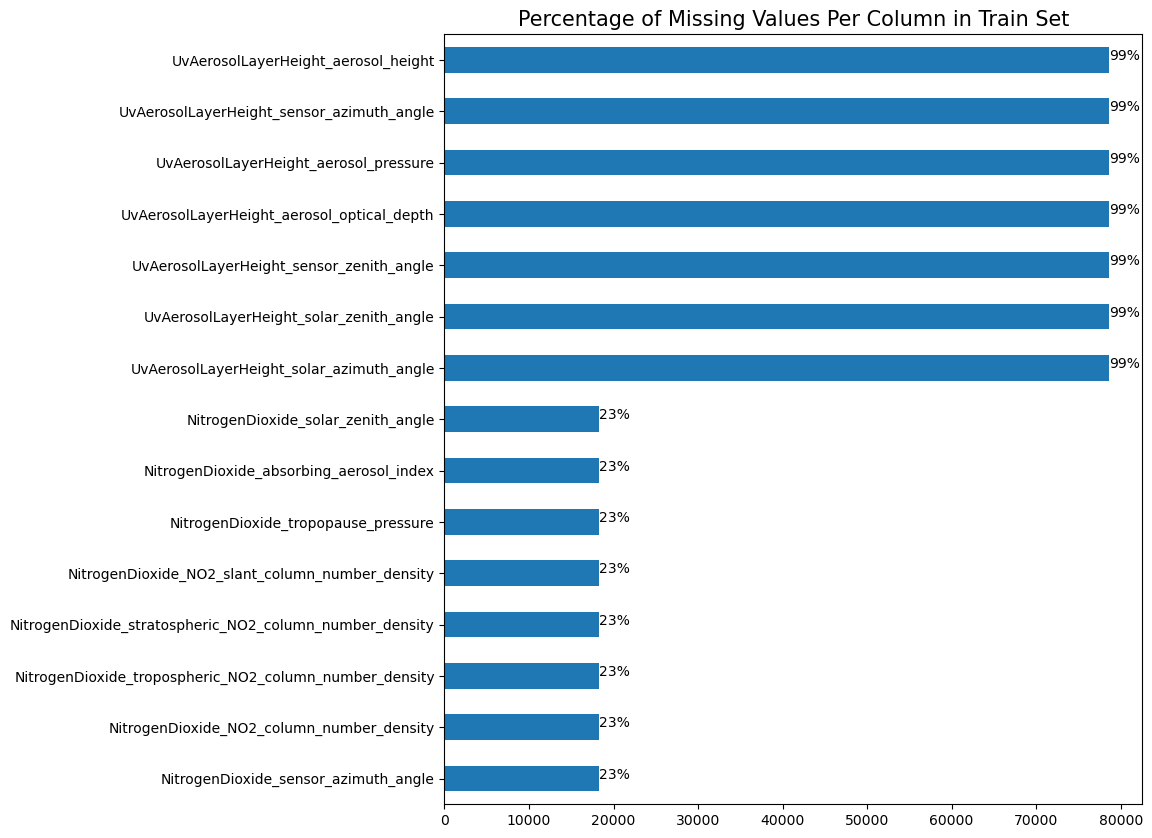

In [7]:
# Plot the percentage of missing values in training set
ax = data.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Reference : https://www.kaggle.com/code/inversion/getting-started-eda#:~:text=COPIED%20FROM%20ZARAKI%20KENPACHI%20%2B4%2C%2D4

We will also check for any duplicate values

In [8]:
data.duplicated().sum()

0

As we can see there are no duplicates in the training dataset

It is oberved that the columns that are related to 'UvAerosolLayerHeight' have 99% null values in the training dataset. In this case data imputation is not prefereed and therefore we must drop these columns

### Dropping some columns

In [9]:
# Creating a list of the columns to be dropped 
drop_cols=[col for col in data.columns if 'UvAerosolLayerHeight' in col]
drop_cols

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

In [10]:
data.drop(columns=drop_cols,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

The SimpleImputer will fill the missing values with the mean(default) value of each column 

We can see that the missing data is imputed and there are no null values present in our dataset now

# Data Visualization

Lets visualize the target variable i.e. 'emission' in our dataset

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution Plot of Emission')

<Figure size 6000x3000 with 0 Axes>

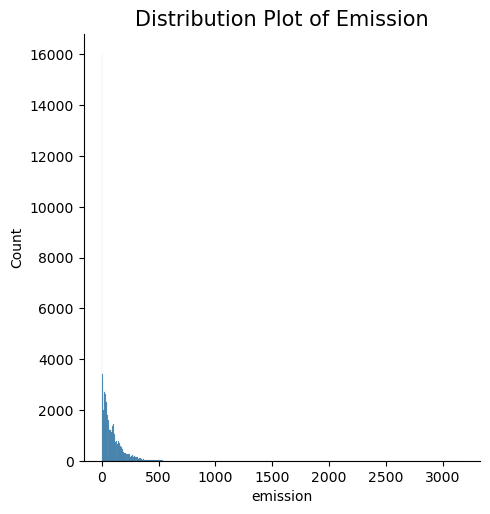

In [12]:
plt.figure(figsize=(20,10),dpi=300)
sns.displot(data=data,x='emission')
plt.title('Distribution Plot of Emission',fontsize=15)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution Plot (KDE) of Emission')

<Figure size 6000x3000 with 0 Axes>

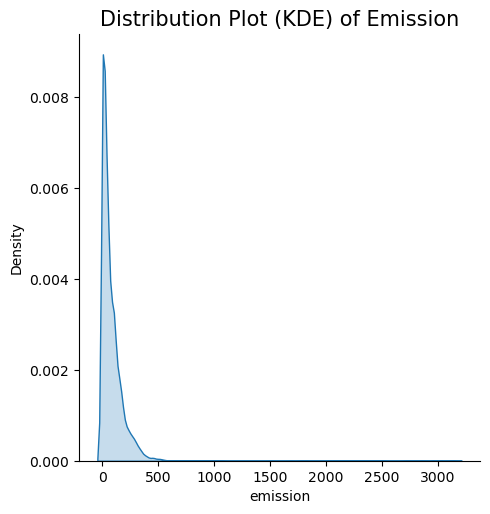

In [13]:
plt.figure(figsize=(20,10),dpi=300)
sns.displot(data=data,x='emission',kind='kde',fill=True)
plt.title('Distribution Plot (KDE) of Emission',fontsize=15)

Positive skewness is observed

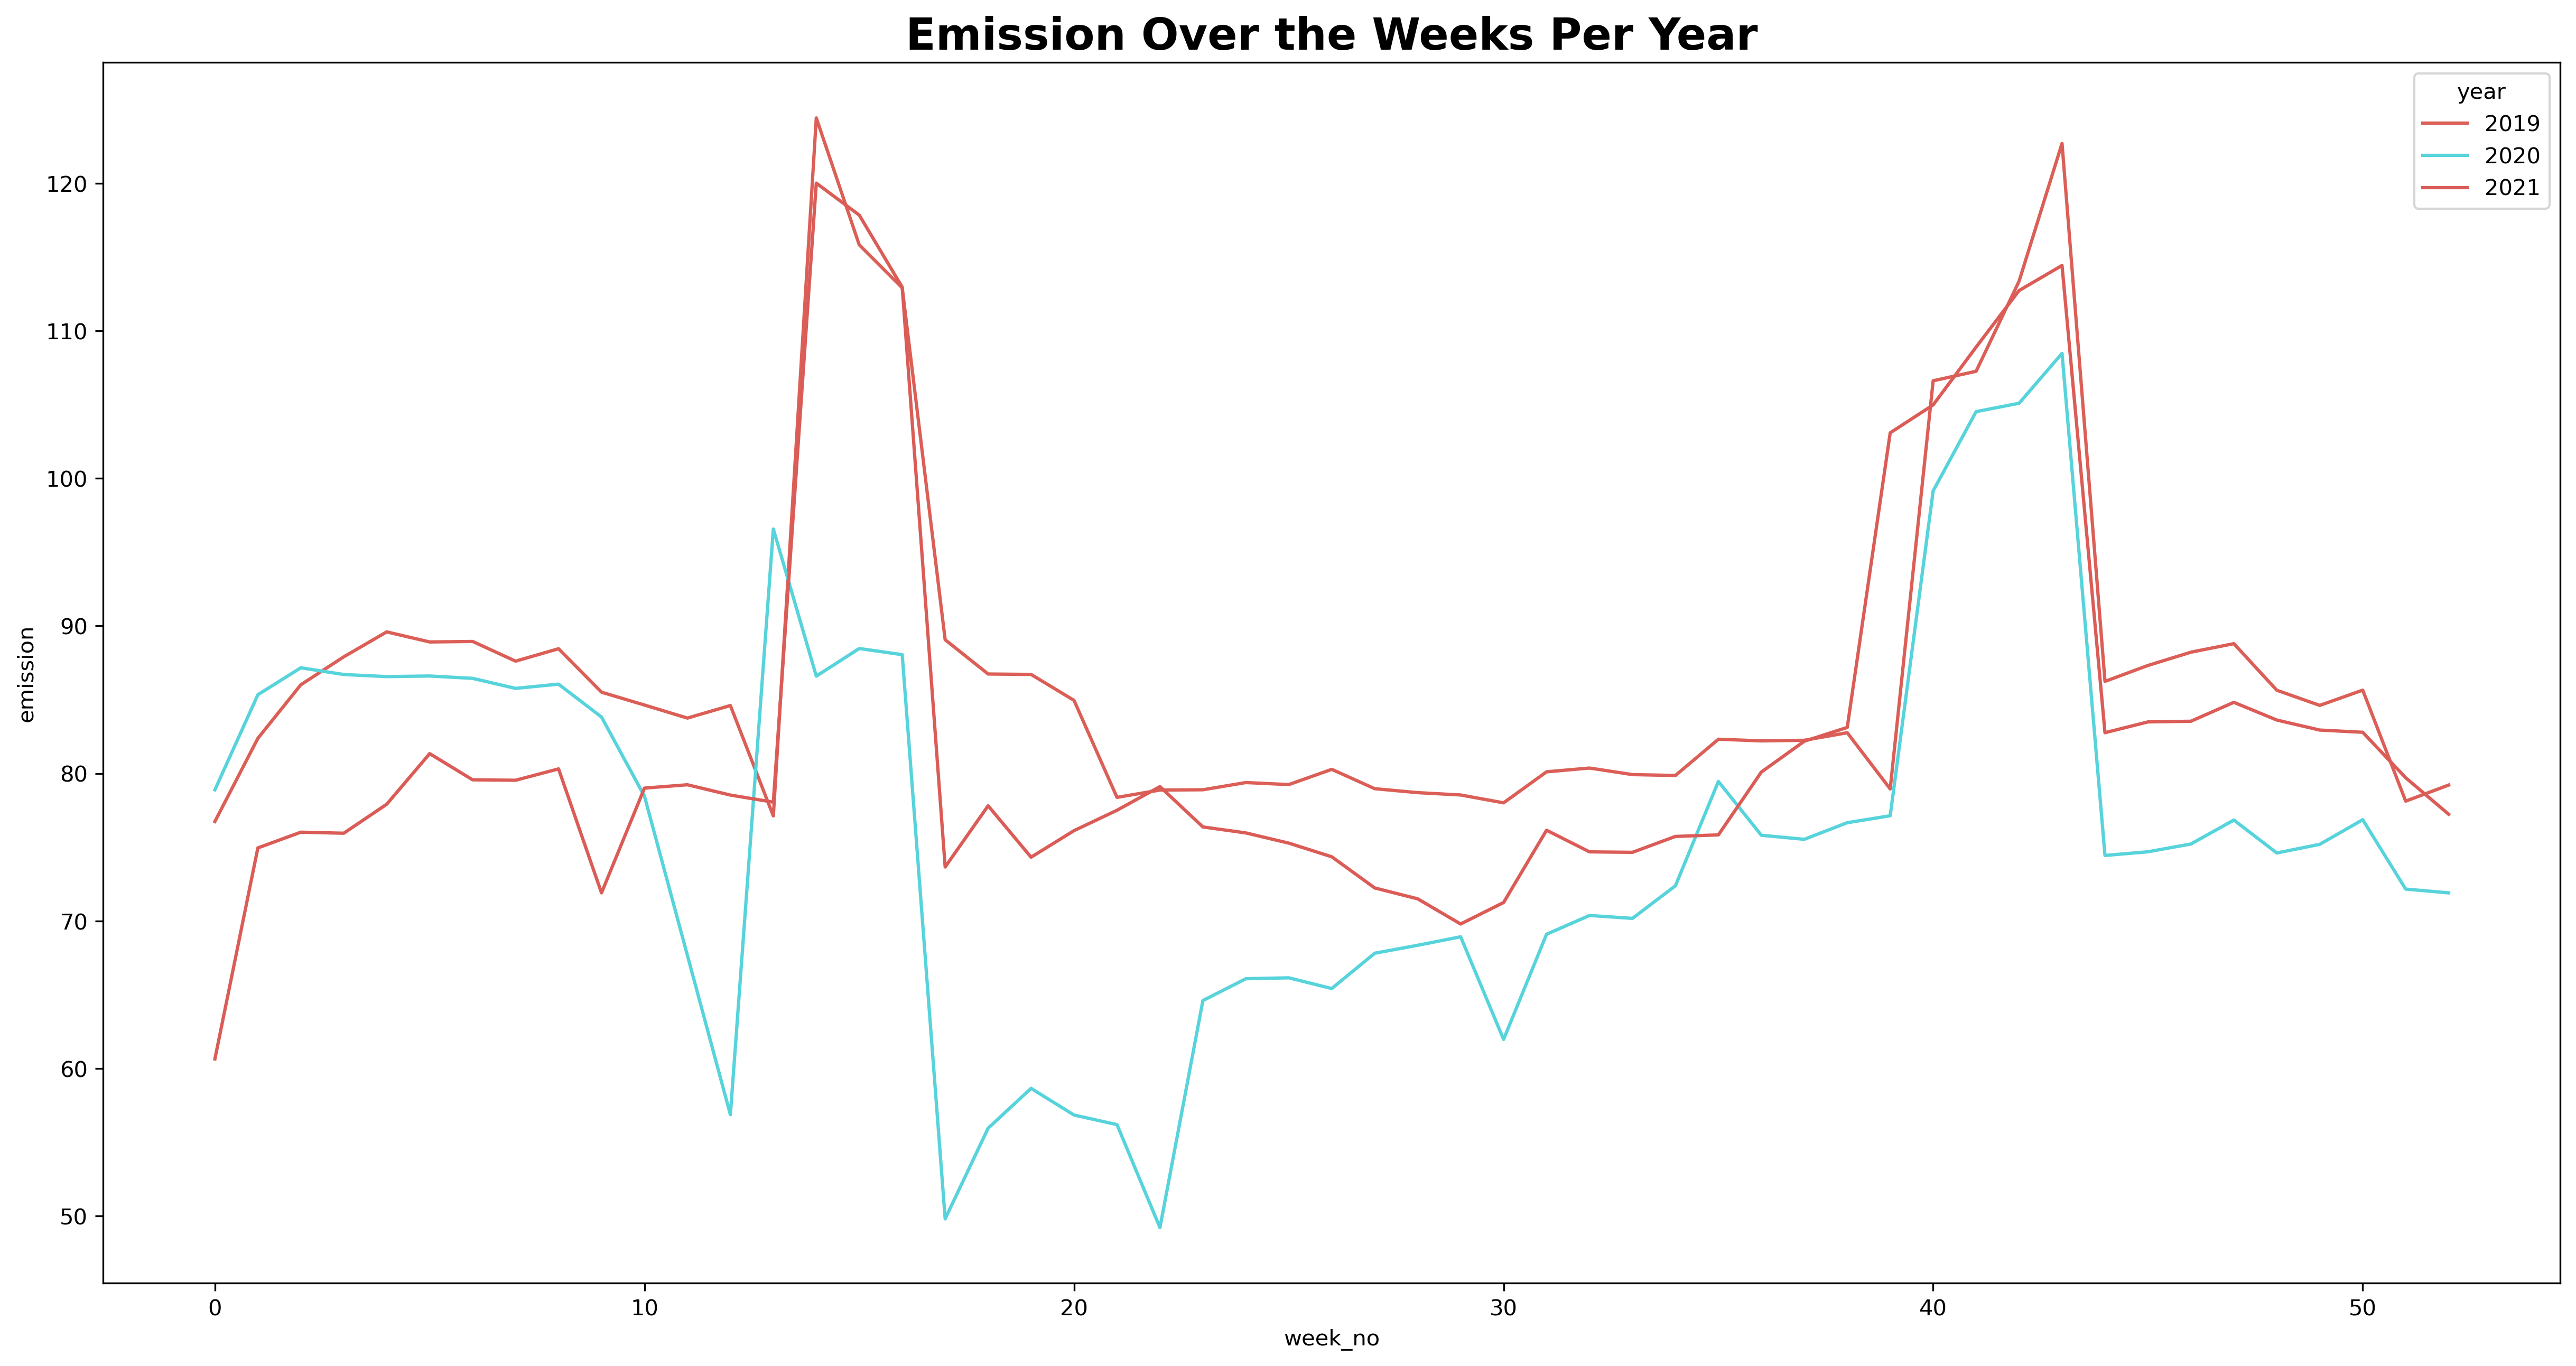

In [14]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = data, x = 'week_no', y = 'emission', hue = 'year', errorbar = None, palette = 'hls')
    
plt.title('Emission Over the Weeks Per Year', fontsize = 20, fontweight = 'bold')
plt.show()


From the graphs the following points can be observed:-
1) There is a pattern for the Emission values with the values being higher for weeks 11-16 and 39-43.

2) The overall Emission values for the year 2020 is smaller than the years 2019 and 2021 (probably due to Covid).

Text(0.5, 1.0, 'Heatmap or Correlation Matrix Plot of Dataset')

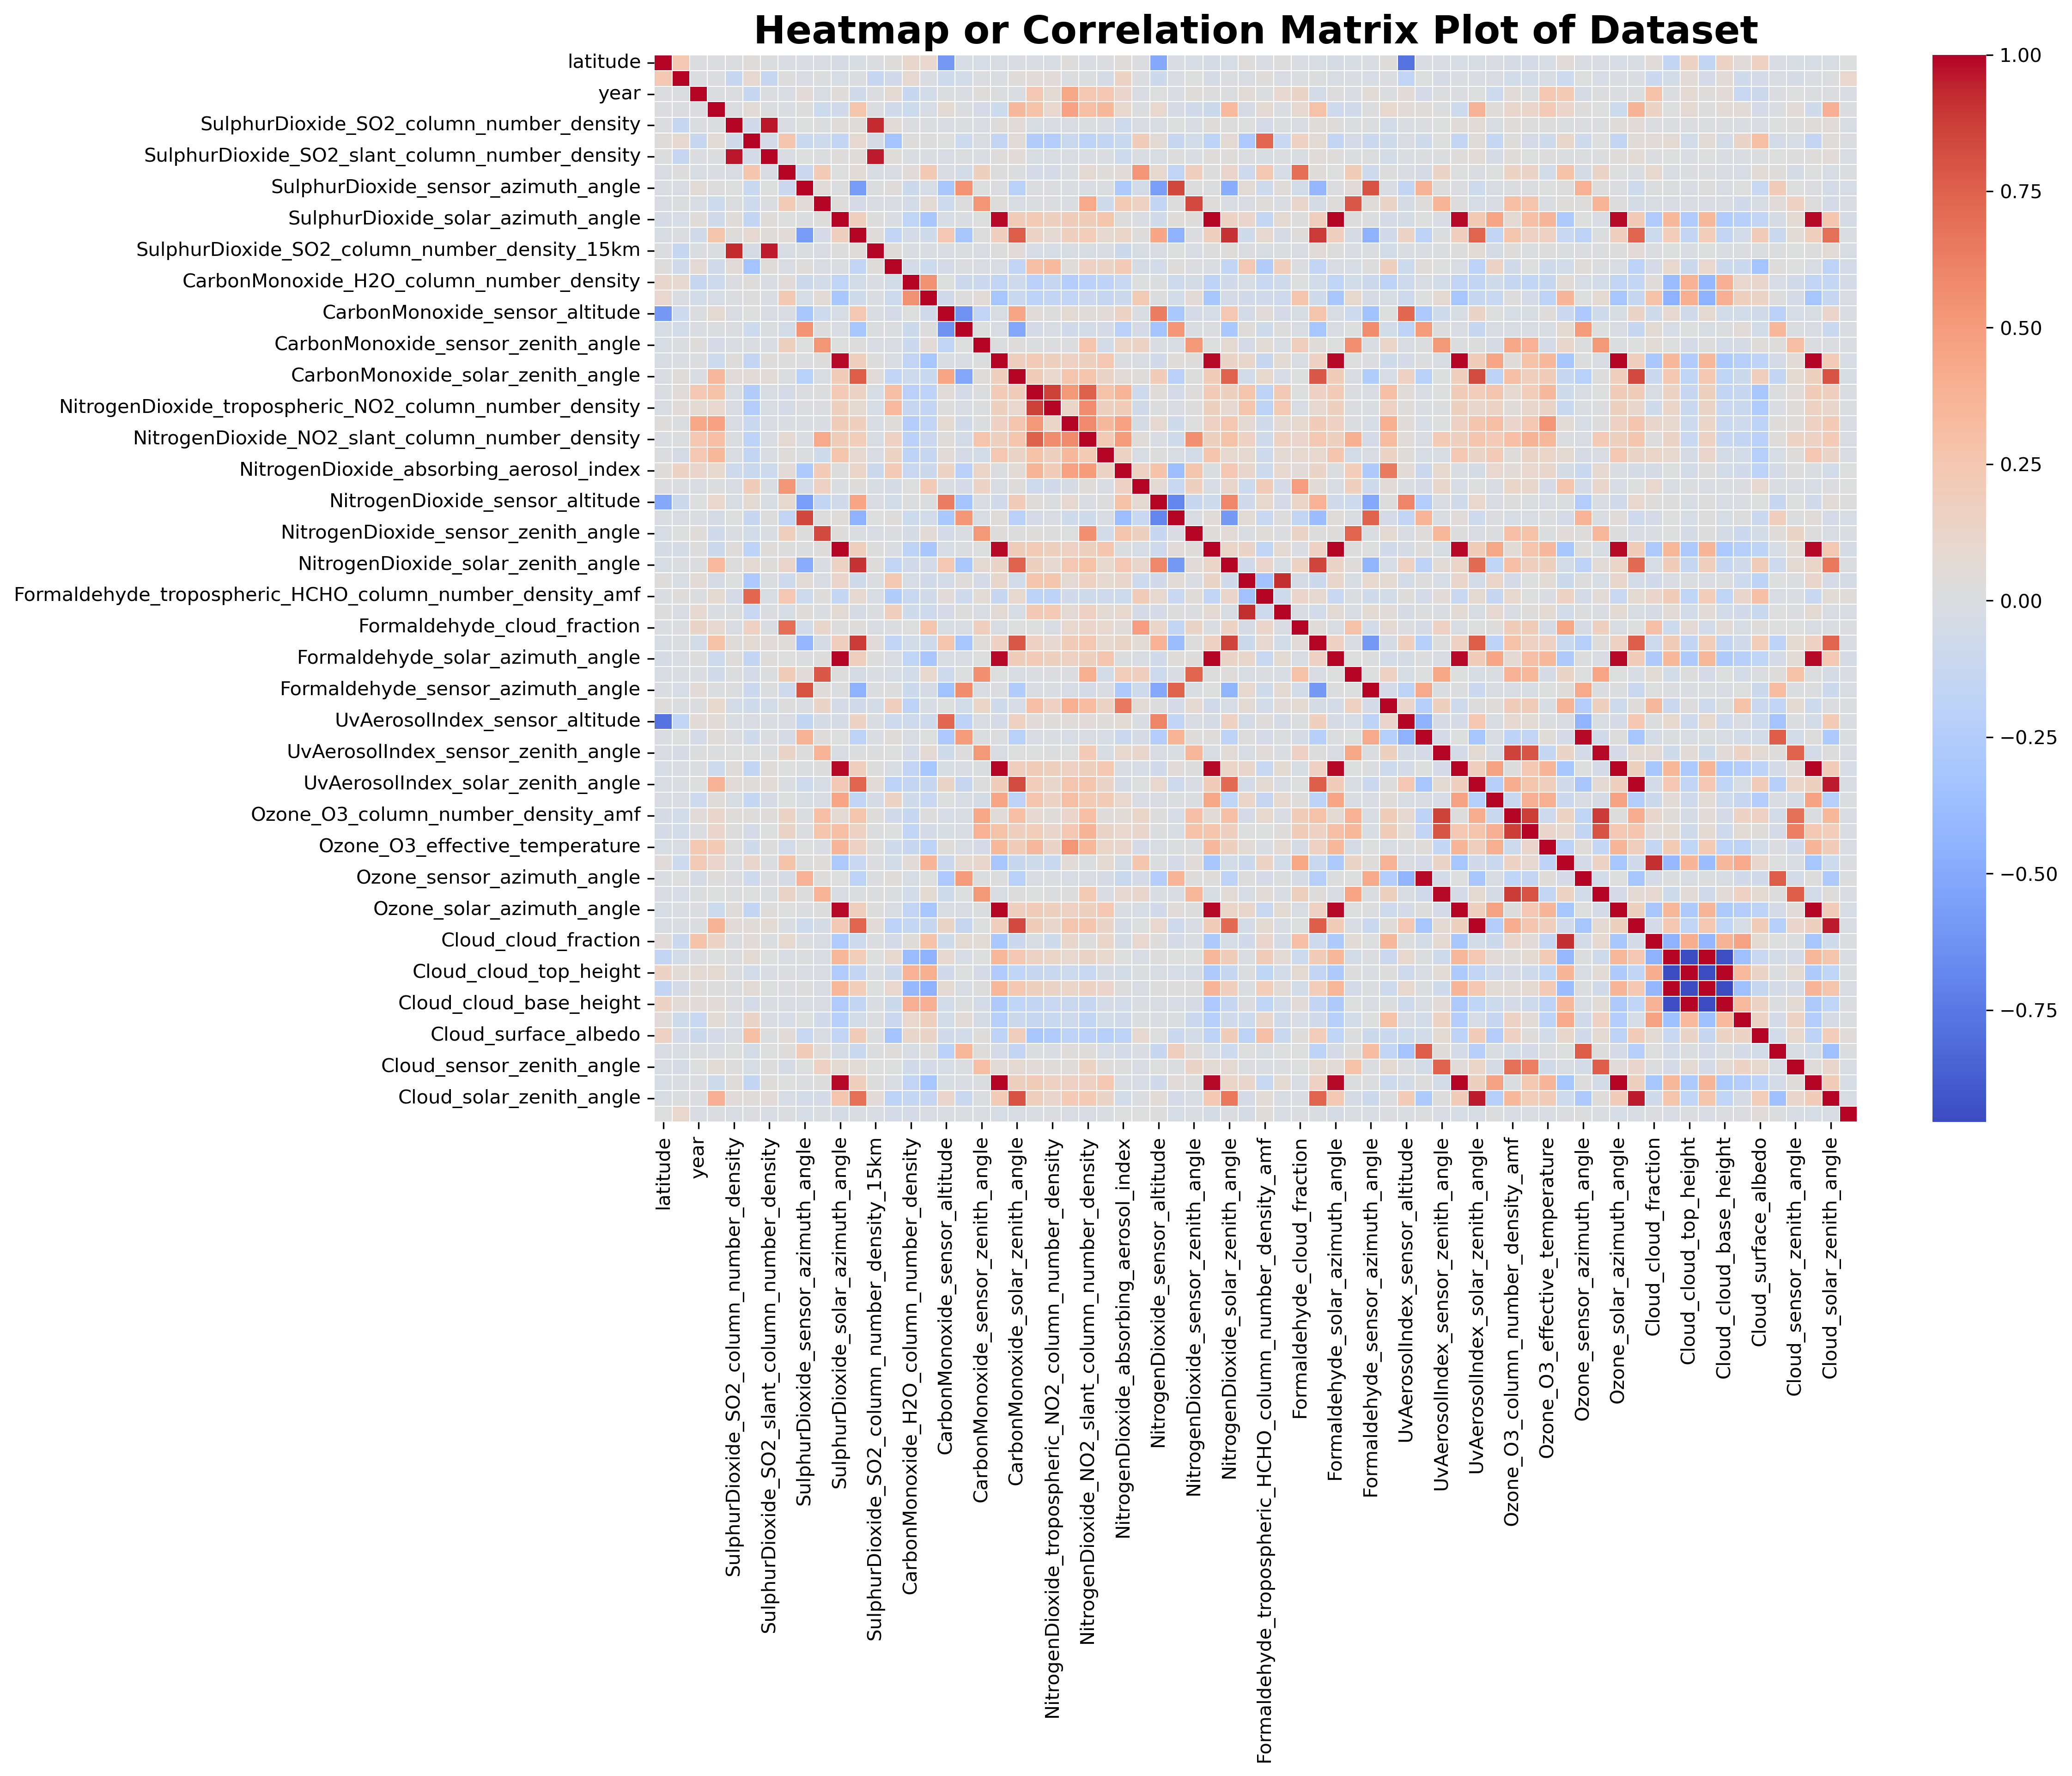

In [15]:
plt.figure(figsize = (14, 10), dpi = 300)
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',linewidths = .1)
plt.title('Heatmap or Correlation Matrix Plot of Dataset', fontsize = 20, fontweight = 'bold')

# Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
X_original=data.drop('emission',axis=1)
y=data['emission']

In [18]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()

In [19]:
X=pd.DataFrame(my_imputer.fit_transform(X_original))
X.columns=X_original.columns
X.index=X_original.index

We will create a function train_and_evaluate_models() that return the model name and rmse value for each model

In [20]:
def train_and_evaluate_models(X, y, models):
    results = []
    
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model in models:
        model_name = model.__class__.__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results.append((model_name, rmse))
    
    return results

In [21]:
models = [
    #LinearRegression(),
    #DecisionTreeRegressor(),
    #RandomForestRegressor(),
    #SVR(),
    #GradientBoostingRegressor()
    XGBRegressor()
]

In [22]:
# Calling the function with the data and models
results = train_and_evaluate_models(X, y, models)

# Printing the results
for model_name, rmse in results:
    print(f"{model_name}: RMSE = {rmse:.2f}")

XGBRegressor: RMSE = 25.22


Following were the RMSE values for the models that were executed. All of the models were trained on the dataset without any hyperparameter tunung:
1) LinearRegression : 126.04

2) DecisionTreeRegressor: 30.47

3) RandomForestRegressor: 24.06

4) XGBRegressor: 25.22

5) SVR : 132.83

6) GradientBoostingRegressor : 64.63

As we can see from the RMSE values, the RandomForestRegressor model gave the best value without any hyperparameter tuning. So we will select it as the base model for future steps.

So we will now train the model on the full Training Dataset

In [23]:
XGB=XGBRegressor()
XGB.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Lets see the test dataset

In [24]:
test_data=pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv',index_col=0)
test_data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 74 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  24353 non-null  float64
 1   longitude                                                 24353 non-null  float64
 2   year                                                      24353 non-null  int64  
 3   week_no                                                   24353 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 7   SulphurDioxide_cloud_fraction                             18211 no

We will preprocess and clean the data as same as we did with our train dataset

In [26]:
test_data.drop(columns=drop_cols,inplace=True)

In [27]:
imputed_test_data=pd.DataFrame(my_imputer.transform(test_data))
imputed_test_data.columns=test_data.columns
imputed_test_data.index=test_data.index

In [28]:
y_pred=XGB.predict(imputed_test_data)

In [29]:
output = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': imputed_test_data.index,
                       'emission': y_pred})
output.set_index('ID_LAT_LON_YEAR_WEEK')
output.to_csv('submission_xgb1.csv', index=False)

In [30]:
output.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,1.198076
1,ID_-0.510_29.290_2022_01,3.142856
2,ID_-0.510_29.290_2022_02,2.067387
3,ID_-0.510_29.290_2022_03,6.091496
4,ID_-0.510_29.290_2022_04,1.866639
